# Customer Churn Analysis

# Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Uploading all Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
churn=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
churn.shape ##no.of Rows and coloumn

(7043, 21)

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From this we can know,there are no null values present

In [6]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Here we can see customer Id has unique value so we drop it

In [8]:
churn.drop(["customerID"],axis=1,inplace=True)

In [9]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


we drop customer_id as it does not affect our dataset

# EDA

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

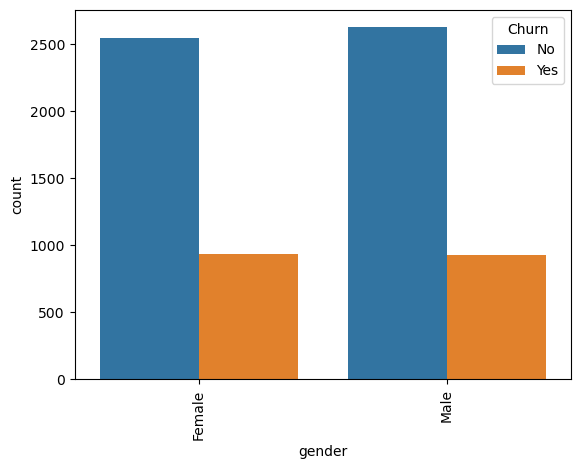

In [10]:
sns.countplot(churn['gender'],hue=churn['Churn'])
plt.xticks(rotation=90)

we can see both male and female have same amount of churn

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

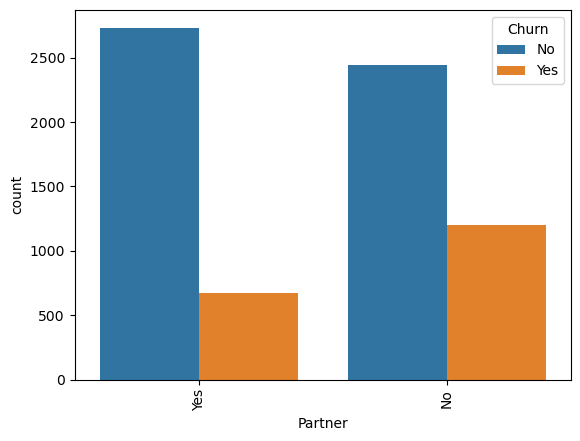

In [11]:
sns.countplot(churn['Partner'],hue=churn['Churn'])
plt.xticks(rotation=90)

For the partners coloumn the churn rate is lower

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

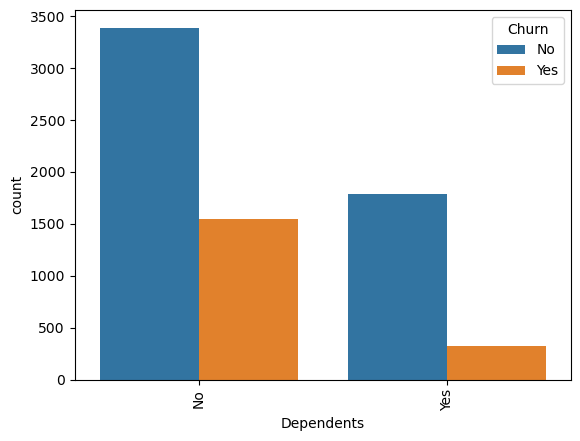

In [12]:
sns.countplot(churn['Dependents'],hue=churn['Churn'])
plt.xticks(rotation=90)

Here in tjis coloumn also the churn rate is lower for the dependents

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

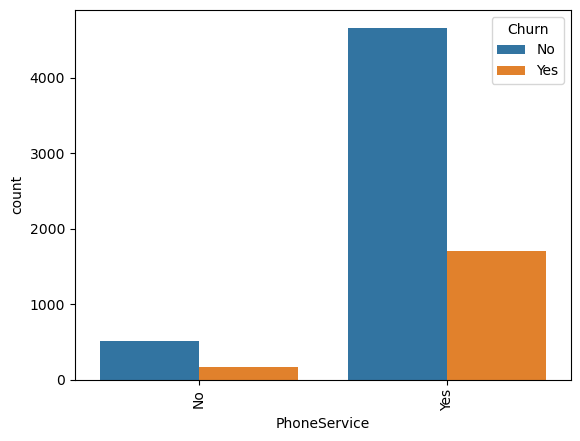

In [13]:
sns.countplot(churn['PhoneService'],hue=churn['Churn'])
plt.xticks(rotation=90)

Here, we can see churn rate is higher with the Phone service

(array([0, 1, 2]),
 [Text(0, 0, 'No phone service'), Text(1, 0, 'No'), Text(2, 0, 'Yes')])

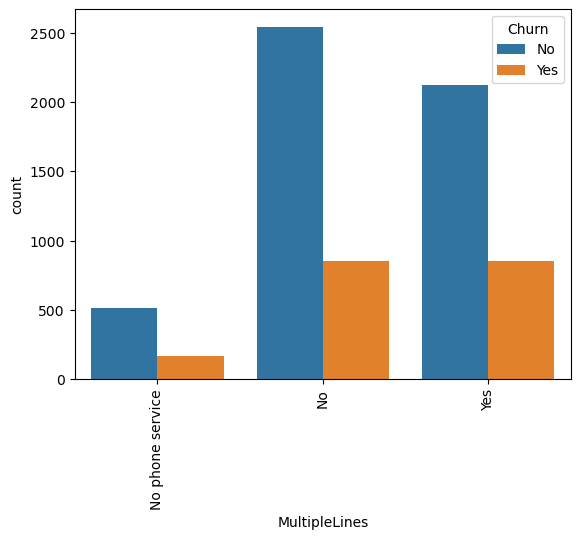

In [14]:
sns.countplot(churn['MultipleLines'],hue=churn['Churn'])
plt.xticks(rotation=90)

It shows churn rate is equal for the customer with and without Multiple lines

(array([0, 1, 2]),
 [Text(0, 0, 'DSL'), Text(1, 0, 'Fiber optic'), Text(2, 0, 'No')])

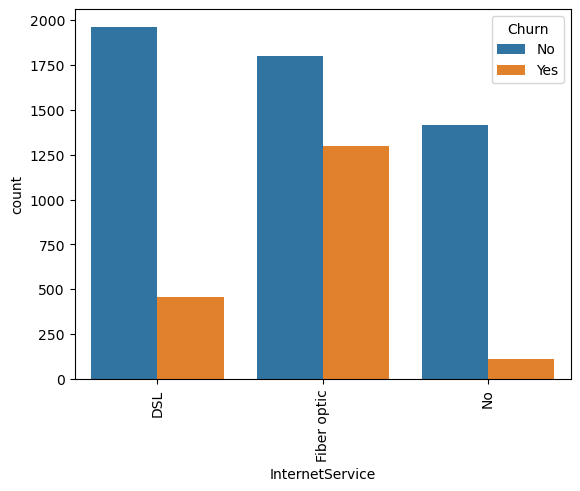

In [15]:
sns.countplot(churn['InternetService'],hue=churn['Churn'])
plt.xticks(rotation=90)

Here we see the churn rate is higher for Fiber optic Internet service

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No internet service')])

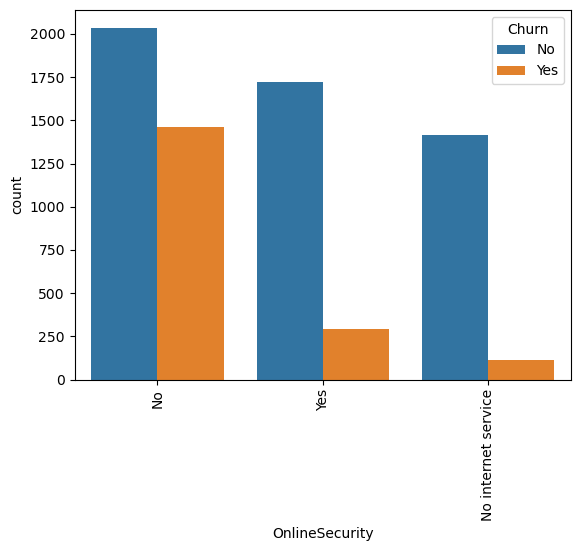

In [16]:
sns.countplot(churn['OnlineSecurity'],hue=churn['Churn'])
plt.xticks(rotation=90)

Here people with no online security shows high churn

(array([0, 1, 2]),
 [Text(0, 0, 'Yes'), Text(1, 0, 'No'), Text(2, 0, 'No internet service')])

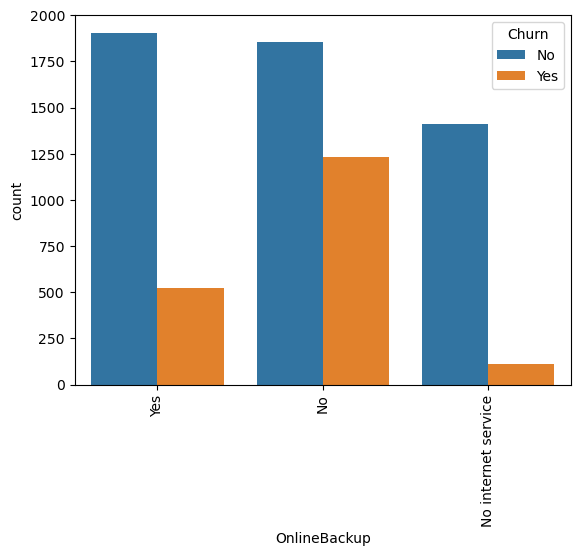

In [17]:
sns.countplot(churn['OnlineBackup'],hue=churn['Churn'])
plt.xticks(rotation=90)

Here also people with no online backup have high chance of churn

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No internet service')])

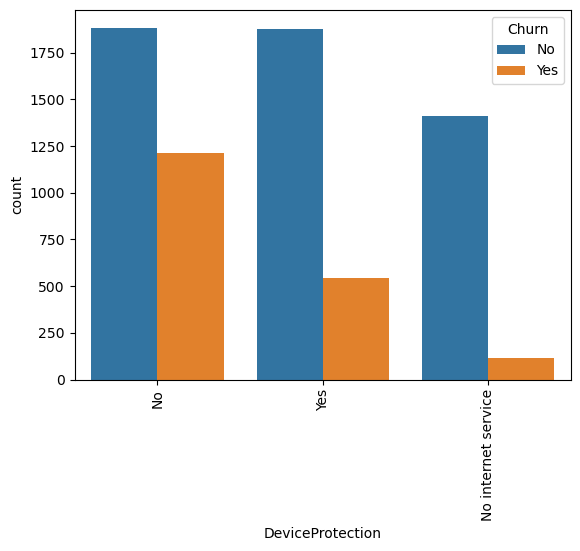

In [18]:
sns.countplot(churn['DeviceProtection'],hue=churn['Churn'])
plt.xticks(rotation=90)

churn rate is higher for people with no Device Protection

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No internet service')])

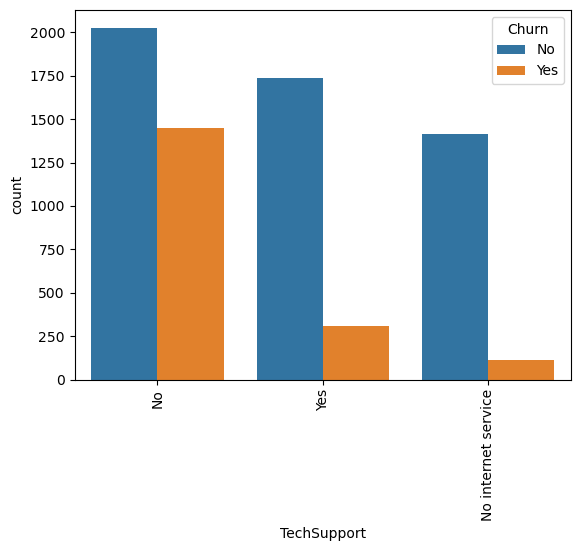

In [19]:
sns.countplot(churn['TechSupport'],hue=churn['Churn'])
plt.xticks(rotation=90)

Churn rate is higher with no tech support

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No internet service')])

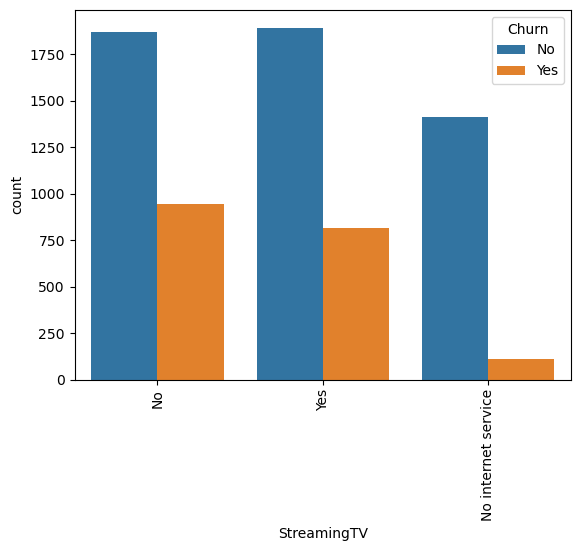

In [20]:
sns.countplot(churn['StreamingTV'],hue=churn['Churn'])
plt.xticks(rotation=90)

churn rate is higher with no TVstreaming

(array([0, 1, 2]),
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No internet service')])

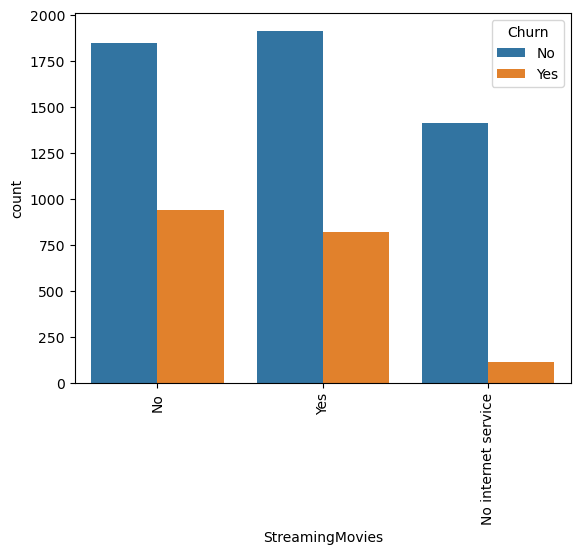

In [21]:
sns.countplot(churn['StreamingMovies'],hue=churn['Churn'])
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

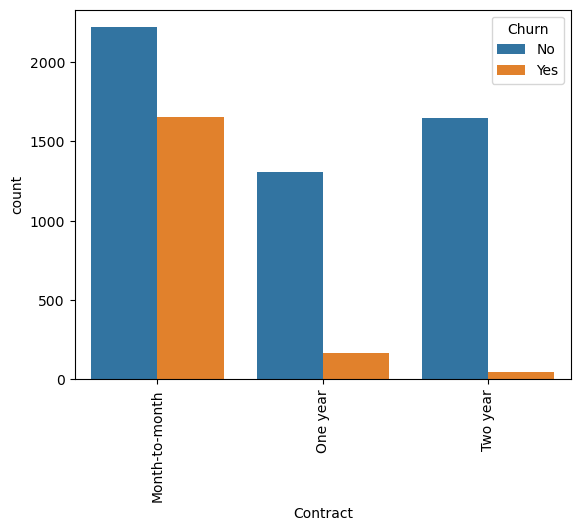

In [22]:
sns.countplot(churn['Contract'],hue=churn['Churn'])
plt.xticks(rotation=90)

Churn rate is higher for month-to-month contract

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

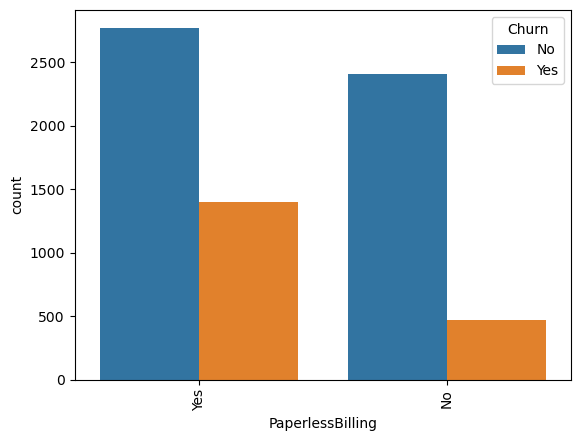

In [23]:
sns.countplot(churn['PaperlessBilling'],hue=churn['Churn'])
plt.xticks(rotation=90)


churn rate is higher for people who prefer paperlessbilling

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

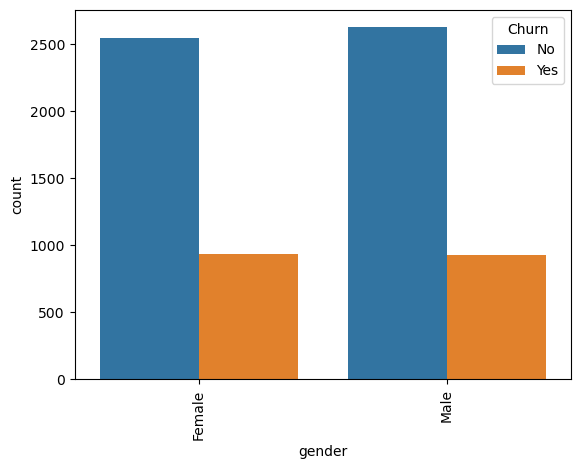

In [24]:
sns.countplot(churn['gender'],hue=churn['Churn'])
plt.xticks(rotation=90)

churn rate is equal for both male and female 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

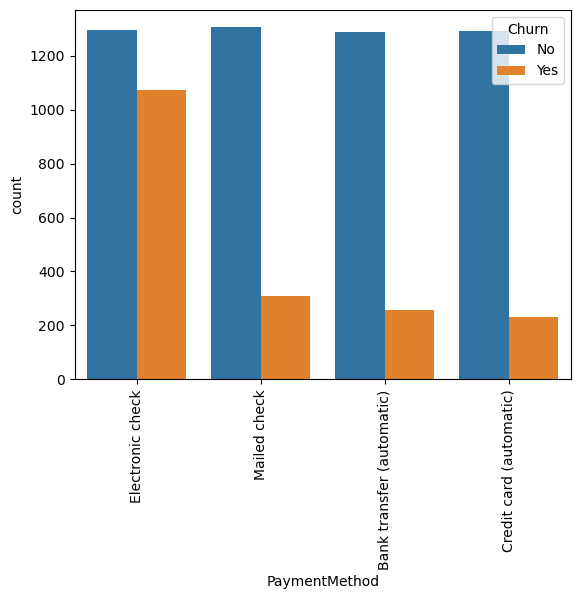

In [25]:
sns.countplot(churn['PaymentMethod'],hue=churn['Churn'])
plt.xticks(rotation=90)

customers who prefer Electronic check have high chances to churn 

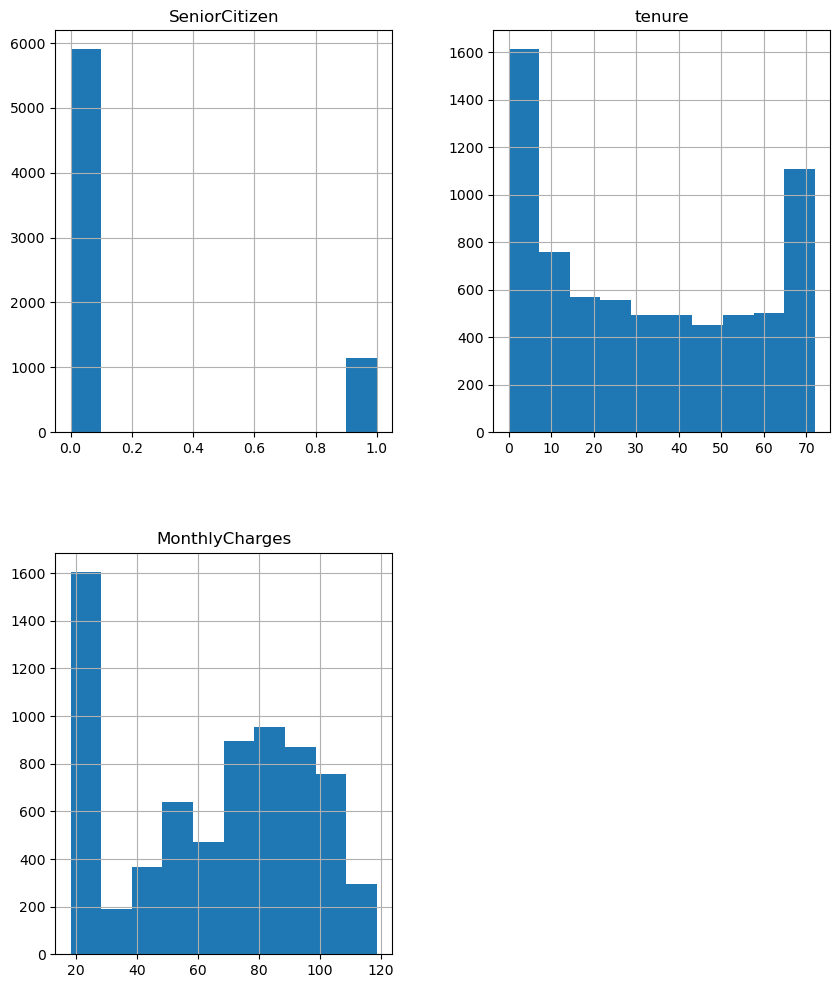

In [26]:
churn.hist(figsize=(10,12))
plt.show()


# Label Encoder

In [27]:
le=LabelEncoder()
list=['gender','Partner','Dependents','PhoneService','MultipleLines',    
'InternetService',      
'OnlineSecurity',       
'OnlineBackup',         
'DeviceProtection',
'TechSupport',         
'StreamingTV',          
'StreamingMovies',      
'Contract',             
'PaperlessBilling',     
'PaymentMethod',       
'TotalCharges',         
'Churn']
for i in list:
    churn[i]=le.fit_transform(churn[i])

# Checking outliers

gender                 AxesSubplot(0.125,0.653529;0.0945122x0.226471)
SeniorCitizen       AxesSubplot(0.238415,0.653529;0.0945122x0.226471)
Partner             AxesSubplot(0.351829,0.653529;0.0945122x0.226471)
Dependents          AxesSubplot(0.465244,0.653529;0.0945122x0.226471)
tenure              AxesSubplot(0.578659,0.653529;0.0945122x0.226471)
PhoneService        AxesSubplot(0.692073,0.653529;0.0945122x0.226471)
MultipleLines       AxesSubplot(0.805488,0.653529;0.0945122x0.226471)
InternetService        AxesSubplot(0.125,0.381765;0.0945122x0.226471)
OnlineSecurity      AxesSubplot(0.238415,0.381765;0.0945122x0.226471)
OnlineBackup        AxesSubplot(0.351829,0.381765;0.0945122x0.226471)
DeviceProtection    AxesSubplot(0.465244,0.381765;0.0945122x0.226471)
TechSupport         AxesSubplot(0.578659,0.381765;0.0945122x0.226471)
StreamingTV         AxesSubplot(0.692073,0.381765;0.0945122x0.226471)
StreamingMovies     AxesSubplot(0.805488,0.381765;0.0945122x0.226471)
Contract            

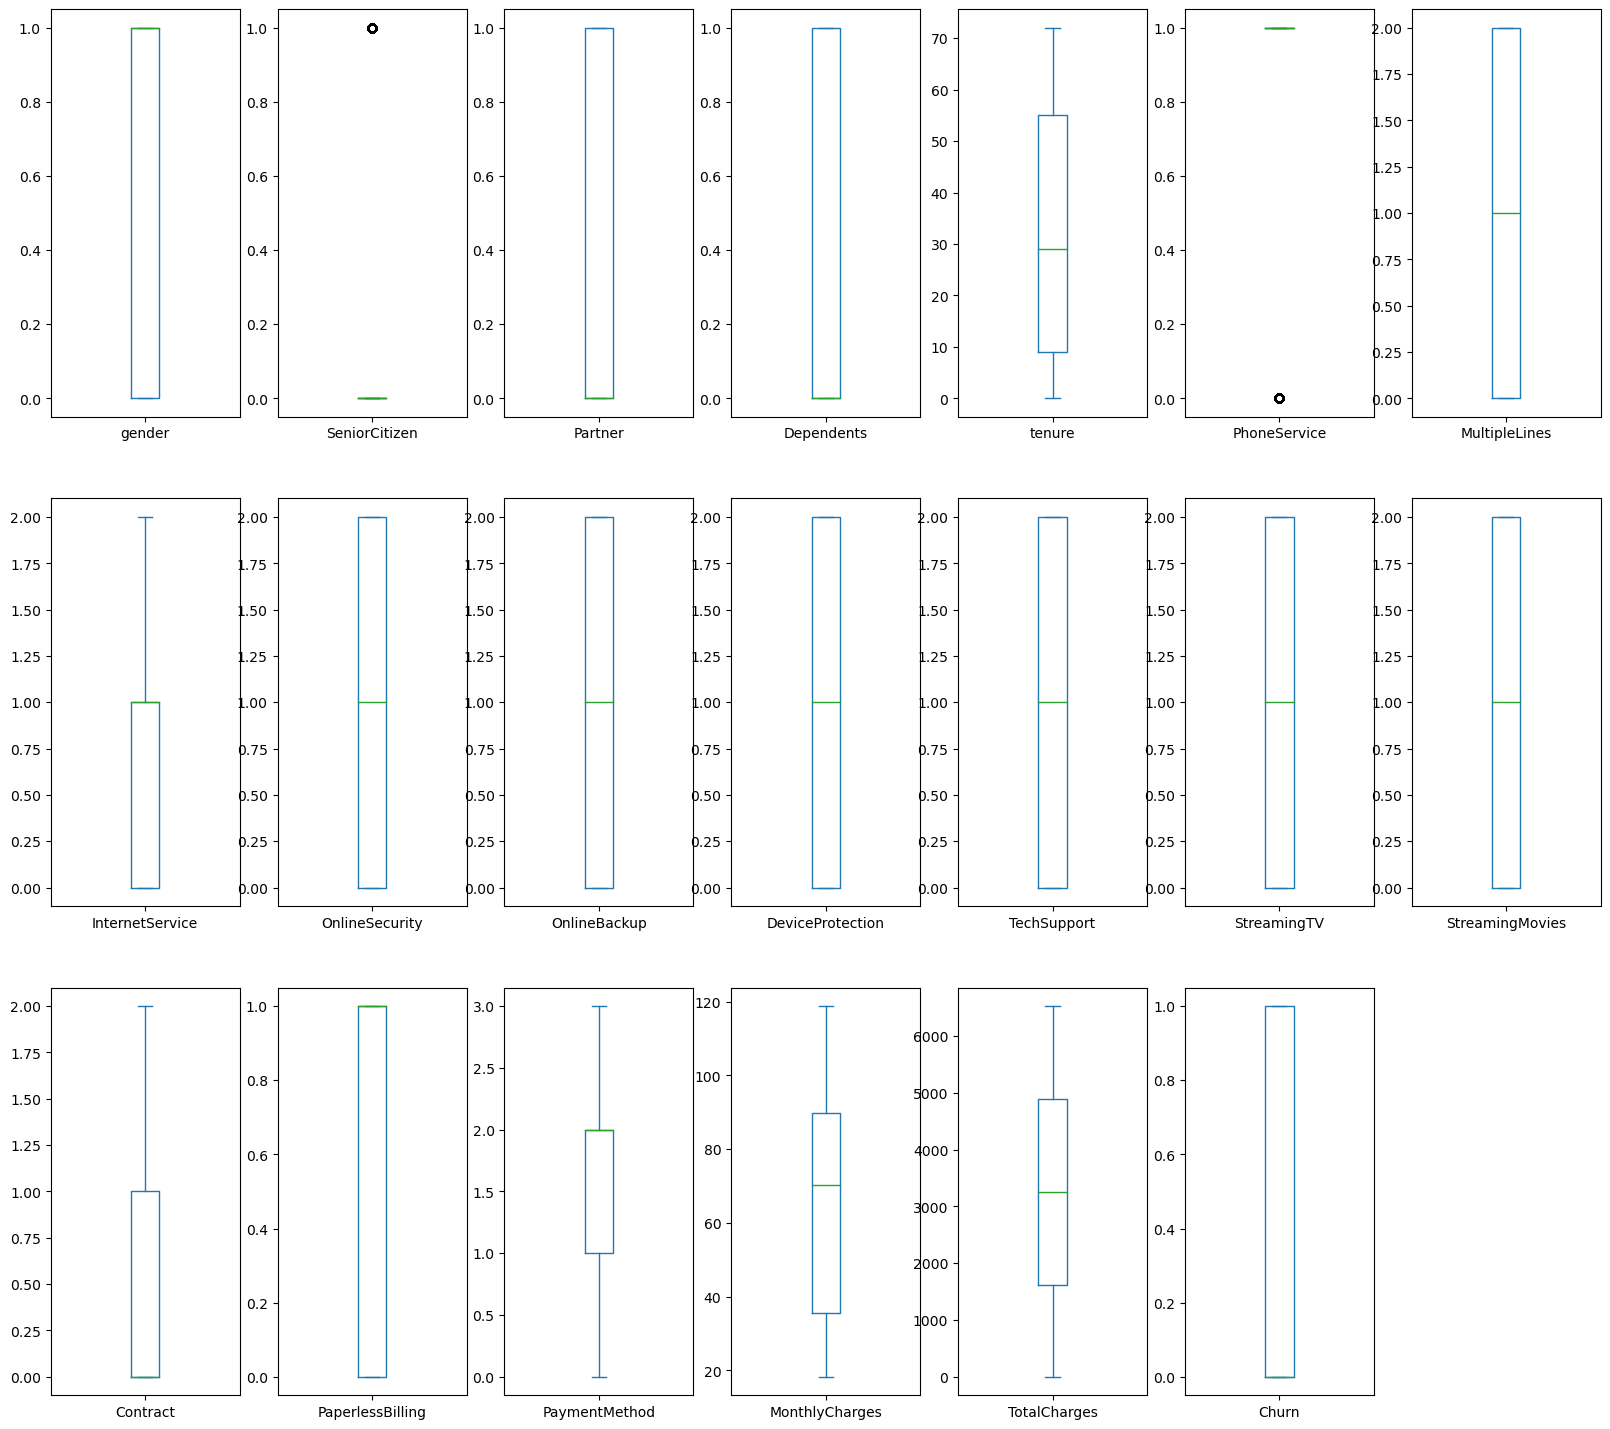

In [28]:
churn.plot(kind='box',subplots=True,layout=(3,7),figsize=(20,18))

we can see less outliers are present in the dataset

# Stastical Analysis

In [29]:
churn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


From this, we can see less outliers are present

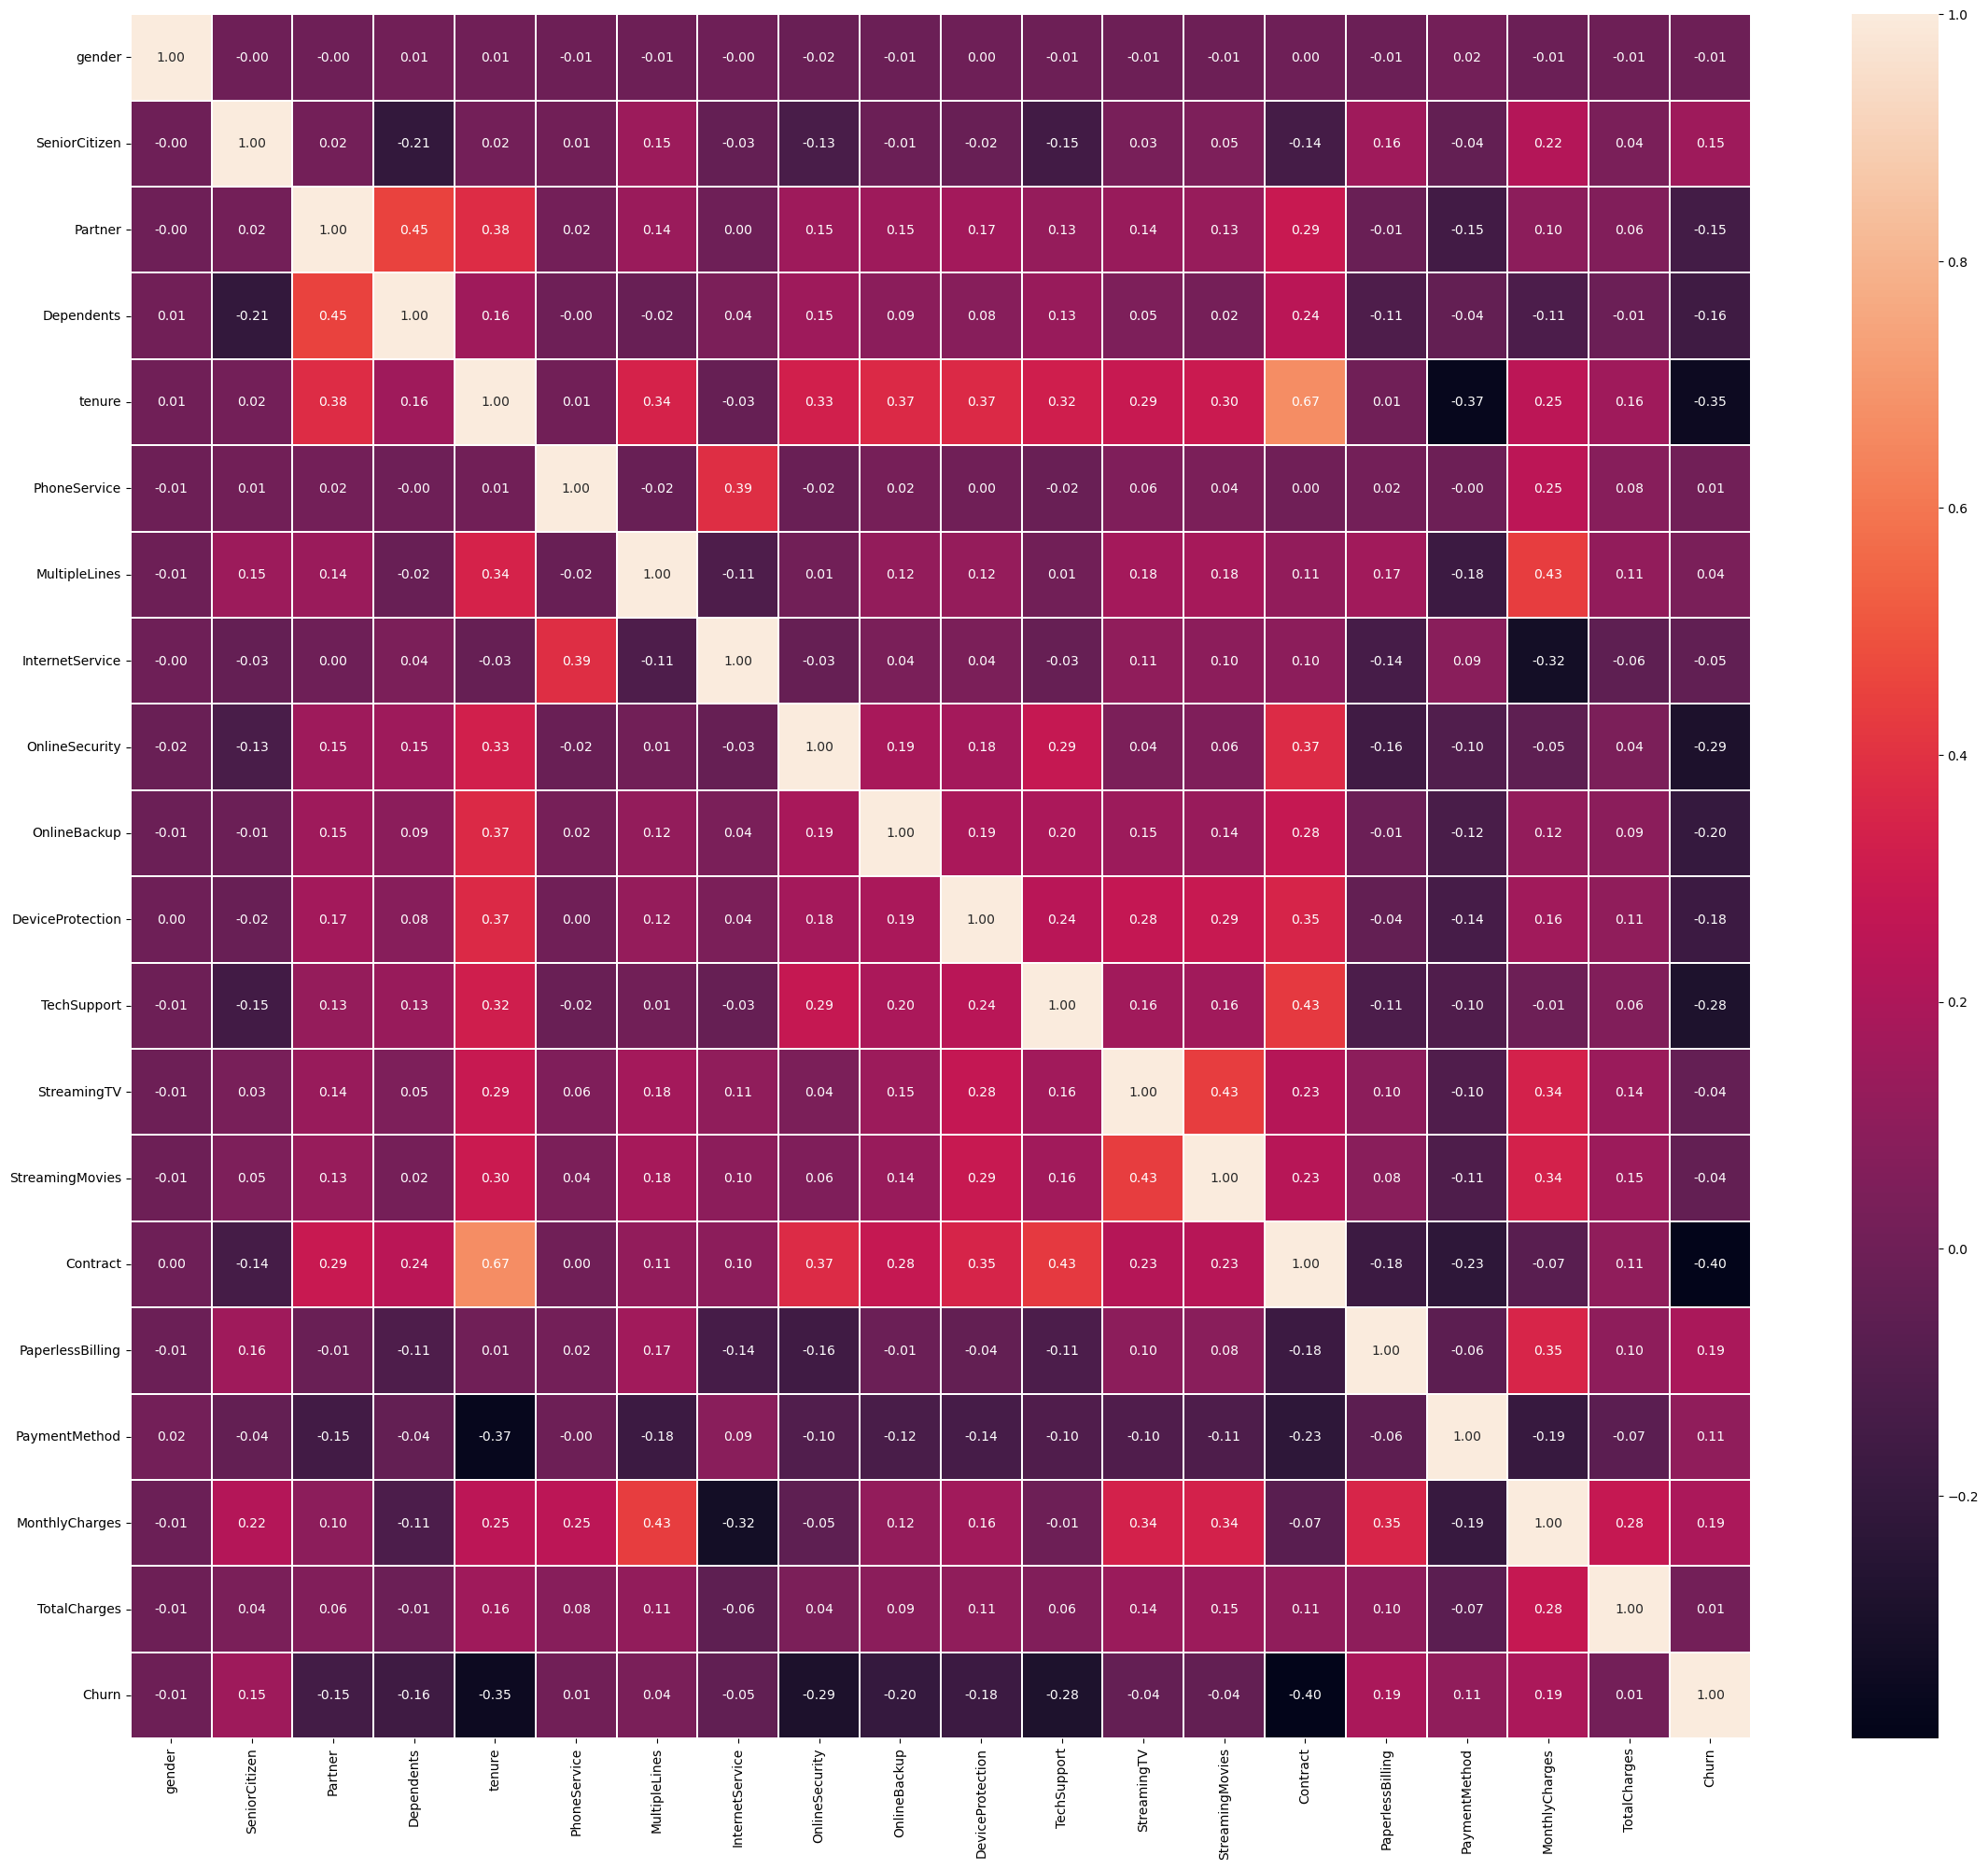

In [30]:
plt.figure(figsize=(28,24))
sns.heatmap(churn.corr(),linewidth=0.2,annot=True,fmt="0.2f")
plt.show()


In [31]:
churn.corr()["Churn"].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
TotalCharges        0.014479
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

In [32]:
churn.drop(['gender'],axis=1,inplace=True)

Here, gender coloumn have -0.008 % correation so we can drop it and there is no multicollinearity present

In [33]:
churn.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# Reducing outliers using Z score method

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(churn))
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [35]:
newchurn=churn[(z<3).all(axis=1)]

In [36]:
newchurn.shape

(6361, 19)

% data loss=(7043-6361)/7043*100=9.6%

In [37]:
churn["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

we can see our target coloumn is imbalanced, so we need to balance our dataset

# Balancing the data

In [38]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x=newchurn.drop(["Churn"],axis=1)
y=newchurn["Churn"]
trainx,trainy=smt.fit_resample(x,y)
trainx.shape

(9324, 18)

In [39]:
trainy.value_counts()

0    4662
1    4662
Name: Churn, dtype: int64

# checking the skewness

In [40]:
trainx.skew().sort_values()

MonthlyCharges     -0.637237
PaperlessBilling   -0.356060
PaymentMethod      -0.215633
TotalCharges       -0.021329
PhoneService        0.000000
InternetService     0.080620
StreamingTV         0.134349
StreamingMovies     0.136214
MultipleLines       0.193078
OnlineBackup        0.465095
DeviceProtection    0.466227
tenure              0.503397
Partner             0.505395
TechSupport         0.804811
OnlineSecurity      0.818491
Contract            1.154354
Dependents          1.401411
SeniorCitizen       2.164743
dtype: float64

In [41]:
from sklearn.preprocessing import power_transform
dft=trainx
trainx=power_transform(trainx,method='yeo-johnson')
xx=pd.DataFrame(data=trainx,columns=dft.columns)
xx.skew().sort_values()

MonthlyCharges     -0.364996
PaperlessBilling   -0.356060
TotalCharges       -0.297418
PaymentMethod      -0.194522
tenure             -0.159972
InternetService    -0.082329
StreamingTV        -0.034669
StreamingMovies    -0.033796
PhoneService        0.000000
MultipleLines       0.133521
DeviceProtection    0.165888
OnlineBackup        0.167365
TechSupport         0.413944
OnlineSecurity      0.421454
Partner             0.505395
Contract            0.768953
Dependents          1.401411
SeniorCitizen       2.164743
dtype: float64

# Standard Scaler

In [42]:
sc=StandardScaler()
dfx=sc.fit_transform(xx)
dfx.mean()

7.620578461605536e-18

# Training and Testing the data

In [43]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

# Knn classifier

In [44]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(x_train,y_train)
predictedy = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy:",accuracy_knn)
print(classification_report(y_test, predictedy))

KNN accuracy: 0.7671428571428571
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      1537
           1       0.62      0.34      0.44       563

    accuracy                           0.77      2100
   macro avg       0.71      0.63      0.65      2100
weighted avg       0.75      0.77      0.74      2100



# Randomforest  Classifier

In [45]:
rf_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf_model.fit(x_train, y_train)


prediction_test = rf_model.predict(x_test)
print ("Random Forest :",accuracy_score(y_test, prediction_test))
print(classification_report(y_test, prediction_test))

Random Forest : 0.809047619047619
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1537
           1       0.70      0.50      0.58       563

    accuracy                           0.81      2100
   macro avg       0.77      0.71      0.73      2100
weighted avg       0.80      0.81      0.80      2100



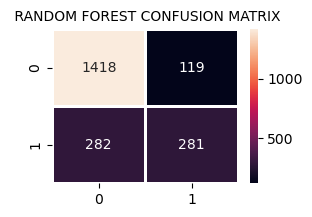

In [46]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linewidths=2)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=10)
plt.show()

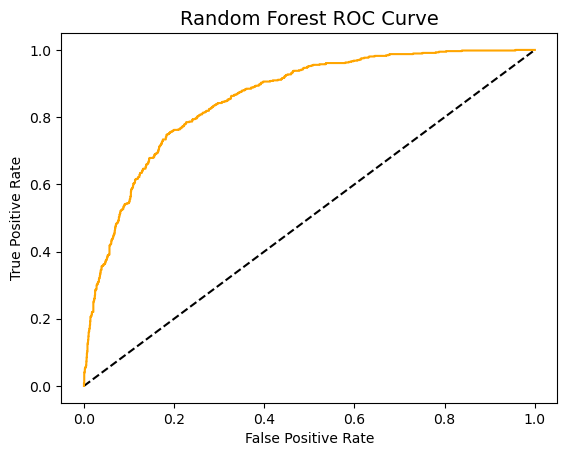

In [47]:
y_rfpred_prob = rf_model.predict_proba(x_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "orange")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=14)
plt.show();

# Logistic Regression

In [48]:
lrn_model = LogisticRegression()
lrn_model.fit(x_train,y_train)
accuracy_lrn = lrn_model.score(x_test,y_test)
print("Logistic Regression accuracy  :",accuracy_lrn)
lrn_pred= lrn_model.predict(x_test)
report = classification_report(y_test,lrn_pred)
print(report)

Logistic Regression accuracy  : 0.8047619047619048
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1537
           1       0.66      0.56      0.61       563

    accuracy                           0.80      2100
   macro avg       0.75      0.73      0.74      2100
weighted avg       0.80      0.80      0.80      2100



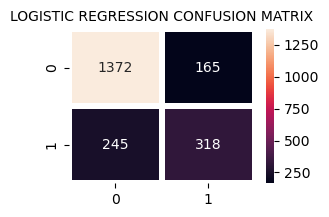

In [49]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, lrn_pred),
                annot=True,fmt = "d",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=10)
plt.show()

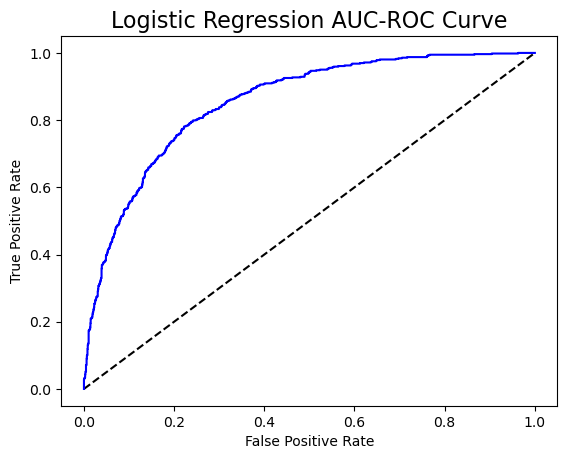

In [50]:
y_pred_prob = lrn_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "b")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression AUC-ROC Curve',fontsize=16)
plt.show();

# DecisionTree Classifier

In [51]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(x_train,y_train)
predictdtc_y = dtc_model.predict(x_test)
accuracy_dtc = dtc_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dtc)
print(classification_report(y_test, predictdtc_y))

Decision Tree accuracy is : 0.7509523809523809
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1537
           1       0.53      0.55      0.54       563

    accuracy                           0.75      2100
   macro avg       0.68      0.69      0.69      2100
weighted avg       0.75      0.75      0.75      2100



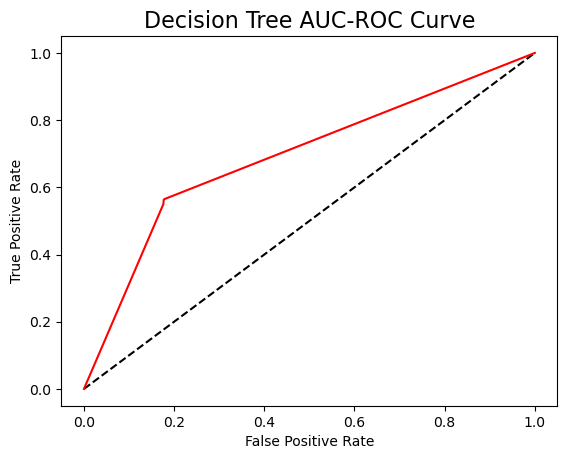

In [52]:
y_pred_prob = dtc_model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree AUC-ROC Curve',fontsize=16)
plt.show();

# Adaboost Classifier

In [53]:
ad_model = AdaBoostClassifier()
ad_model.fit(x_train,y_train)
ad_preds = ad_model.predict(x_test)
print("AdaBoost Classifier accuracy :",accuracy_score(y_test, ad_preds))
print(classification_report(y_test, ad_preds))

AdaBoost Classifier accuracy : 0.810952380952381
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1537
           1       0.67      0.58      0.62       563

    accuracy                           0.81      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.80      0.81      0.81      2100



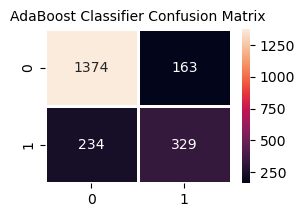

In [54]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, ad_preds),
                annot=True,fmt = "d",linewidths=2)
    
plt.title("AdaBoost Classifier Confusion Matrix",fontsize=10)
plt.show()

# Gradientboost Classifier

In [55]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

Gradient Boosting Classifier 0.8104761904761905
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1537
           1       0.68      0.56      0.62       563

    accuracy                           0.81      2100
   macro avg       0.76      0.73      0.74      2100
weighted avg       0.80      0.81      0.80      2100



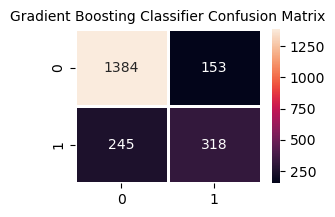

In [56]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, gb_pred),
                annot=True,fmt = "d",linewidths=2)
    
plt.title("Gradient Boosting Classifier Confusion Matrix",fontsize=10)
plt.show()

Random Forsest Method gives maximum accuracy 

# HyperParameter Tuning

In [57]:
from sklearn.model_selection import GridSearchCV
dict={"max_features":['auto','sqrt','log2'],
      "max_depth":[12,15,17],
      "criterion":["gini","entropy"],
     "n_estimators":[100,200]}
gdsv=GridSearchCV(estimator=rf_model,param_grid=dict,cv=8)

In [58]:
gdsv.fit(dfx,trainy)

GridSearchCV(cv=8,
             estimator=RandomForestClassifier(max_features='auto',
                                              max_leaf_nodes=30,
                                              n_estimators=500, n_jobs=-1,
                                              oob_score=True, random_state=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 15, 17],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [59]:
gdsv.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 200}

In [60]:
gdsv.best_score_

0.8154399693755108

we can conclude that Random forest method gives maximum accuracy of 81%

# Saving the Model

In [61]:
import pickle
filename="customerchurn_analysis.pkl"
pickle.dump(rf_model,open(filename,'wb'))